# Linear Regression

If a linear relatinship exists between a pair of variables, then regression helps to identify the coefficients of that relationship.

For example, we have a relationship
$ y = \alpha + \beta x $
for a set of $m$ pairs of $y$ and $x$. Then linear regression would aim to identify the values of $ \alpha $ and $\beta$ from the given data points.

For each data point, the relationship is not exact and there is a random error involved. 

$ y_i  = \alpha + \beta x_i + u_i $
(where $u_i$ is the error component)

So, the relationship is not as easy to estimate as solving a pair of equations. To make calculations easier, we impose a set of restrictions on $u_i$

##### Assumptions
1. $u_i \stackrel{i.i.d.}{\sim} N(0,\sigma^2)$ , that is $u_i$ is independently and identically distributed from a normal distribution and a violation of this means that many of the existing statistical tests may not hold true.
2. $E(u_i) = 0 $, that is the expectation (or mean) of the error is zero. Any violation of this would result in biased estimators.
3. $V(u_i) = \sigma^2$, that is the variance ofthe errors is constant. The violation of this is known as heteroskedasticity and would result in inefficient estimators.
4. $E(u_i u_j) = 0, i \neq j$, that is the errors are uncorrelated with each other. One of the violations of this occurs when the errors are serially correlated and is known as autocorrelation which results in inefficient estimators.
5. $E(x_i u_i) = 0$, any violation of this is known as endogeneity and results in inconsistent estimators.

In [6]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS

%matplotlib inline

Let us generate a random dataset and see what the regression in the existing packages looks like. Here, we'll use LinearRegression in sklearn and OLS (ordinary least squares) in statsmodels

In [63]:
# setting sample size
m = 200

# generating random sample of x (here, I am assuming that x is coming from a uniform distribution)
x = np.random.uniform(low = 0, high = 10, size = m)

# generating the errors (note that errors need to come from a normal distribution)
u = np.random.normal(loc = 0, scale = 3.5, size = m) # loc = mean, scale = variance

# arbitrarily setting a relation of y = 4 + 5x (numpy takes care of broadcasting the neceesary size)
y = 13 + 8*x + u

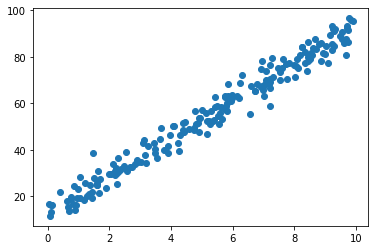

In [64]:
# plotting and seeing what the data looks like
plt.scatter(x,y)

From the above graph, we can expect the relationship to be linear but do not necessarily know what that could be. Let's see what the libraries give us.

Documentation:
1. [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
2. [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html)

In [65]:
# from sklearn
model = LinearRegression()
model.fit(x.reshape(-1,1),y)

# results
print("R^2 = \t\t {0:.4f}".format(model.score(x.reshape(-1,1),y)))
print("intercept = \t {0:.4f}".format(model.intercept_))
print("slope = \t {0:.4f}".format(model.coef_[0]))

R^2 = 		 0.9724
intercept = 	 13.0796
slope = 	 8.0092


In [66]:
# from statsmodels

# statsmodels requires a constant to be present for calculating the intercept
X = np.array([np.ones(m), x]).T    # there is a add constant function too but here we add the constant manually
print("Shape of X is", X.shape)
print("First element of X is", X[0])

Shape of X is (200, 2)
First element of X is [1.         1.44453756]


In [67]:
# running the regression
model = OLS(y,X, hasconst=True)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     6967.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          2.91e-156
Time:                        12:39:24   Log-Likelihood:                -554.86
No. Observations:                 200   AIC:                             1114.
Df Residuals:                     198   BIC:                             1120.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0796      0.577     22.662      0.0

Suddenly, we have a lot more data available on running the regression. We can see that the R-squared, intercept and slope are the same from both the methods but we don't know what $R^2$, $std err$, $t$, $P>|t|$ or the various other terms are. The next part of the notebook has two objective:
1. Understanding how the coefficients were derived
2. Understanding what most of the terms in the results of statsmodels mean

#### Deriving the solutions of the coefficients
We aim to find $\alpha$ and $\beta$ that minimize the variance of the error term, that is, we find $\alpha$ and $\beta$ such that
$$
Min \hspace{0.2cm} \Sigma u_i^2 \\
\hspace{2.5cm} = Min \hspace{0.2cm} \Sigma (y_i - \alpha - \beta x_i)^2 
$$

This term can be minimized by differentiating $\Sigma (y_i - \alpha - \beta x_i)^2$ with respect to $\alpha$ and $\beta$. On doing that we get the equations:
$$
\hat \beta = \frac{\Sigma(x_i - \bar x)(y_i - \bar y)}{\Sigma(x_i - \bar x)^2}\\
\hat \alpha = \bar y - \hat \beta \bar x
$$
where $\hat \beta$ and $\hat \alpha$ are the estimated values of $\alpha$ and $\beta$ (while $\alpha$ and $\beta$ are the actuals values).

The equations for $\hat \beta$ and $\hat \alpha$ are also known as the **normal equations**.

In [75]:
# if we do this manually
x_bar = x.mean()
y_bar = y.mean()
beta_hat = np.sum(np.dot(x-x_bar, y-y_bar))/np.sum(np.power(x-x_bar, 2))
alpha_hat = y_bar - beta_hat * x_bar
print("beta_hat = {0:.4f}".format(beta_hat))
print("alpha_hat = {0:.4f}".format(alpha_hat))

beta_hat = 8.0092
alpha_hat = 13.0796


We have obtained the exact value as that given by the libraries used.

#### Understanding the terms